In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

# set plot options 
plt.rcParams['figure.figsize'] = (15,15) # Pick something here, bigger than (6.0,4.0)
plt.rcParams['font.size'] = 25           # pick something bigger than 10 
plt.rcParams['lines.markersize'] = 7     # bigger markers 

def load_data( index ):
    filename = "output" + "%08u" % index + ".csv"
    print( "Loading data from " + filename + " ...")

    file = open(filename, "r")

    # number of cells 
    line = file.readline(); 
    data = line.split(); 
    number_of_cells = np.int( data[0] ); 

    # allocate cell data 
    positions = np.zeros( (number_of_cells,2) )
    radii =  np.zeros( (number_of_cells,1) )
    velocities = np.zeros( (number_of_cells,2) ) 
    birth_rates = np.zeros( (number_of_cells,1) )
    death_rates = np.zeros( (number_of_cells,1) )
    mechanics_strengths = np.zeros( (number_of_cells,1) )
    
    # read cell data 
    for n in range(number_of_cells):
        line = file.readline(); # read line
        data = line.split(','); # turn into array of strings 
        positions[n,:] = np.double( data[0:2] );
        radii[n] =  np.double( data[2])  
        velocities[n,:] = np.double( data[3:5])  
        birth_rates[n] = np.double( data[5])  
        death_rates[n] = np.double( data[6])
        mechanics_strengths[n] = np.double( data[7])  
        
    # read X coordinates 
    line = file.readline(); 
    data = line.split(','); 
    X = np.double( data )
    m = X.shape[0]
    
    # read Y coordinates 
    line = file.readline(); 
    data = line.split(','); 
    Y = np.double( data )
    n = Y.shape[0] 
    
    # allocate substrate memory
    substrate = np.zeros( (m,n))
    line = file.readline(); 
    data = line.split(',')
    data = np.double( data )
    # copy data into array 
    for j in range(n):
        for i in range(m):
            substrate[i,j] = data[ j*m + i ]
    file.close()
    return X,Y,substrate,positions,radii,velocities,birth_rates,death_rates,mechanics_strengths

In [2]:
X,Y,substrate,positions,radii,velocities,birth_rates,death_rates,mechanics_strengths = load_data( 0)

Loading data from output00000000.csv ...


In [3]:
def plot_substrate( X , Y , substrate ):
    plt.contourf(X,Y,np.transpose(substrate)); 
    plt.xlabel('x')
    plt.ylabel('y')
    plt.colorbar()
    plt.axis('image')
    return;

def plot_cells( positions, radii, velocities , X='none' , Y='none'):
    plt.scatter( positions[:,0] , positions[:,1] ,s=radii*10 , c='r' )
    plt.quiver( np.transpose(positions[:,0]) , np.transpose(positions[:,1]), 
        np.transpose(velocities[:,0]) , np.transpose(velocities[:,1]) ,
        scale=1, headwidth=4,headlength=3,headaxislength=2,width=.003)
    if( X == 'none' or Y =='none'):       
        scale = 75
        m,n = positions.shape 
        center = [ np.mean( positions[:,0]) , np.mean( positions[:,1]) ]
        width = 150; 
        axes = [center[0]-0.5*width,center[0]+0.5*width, 
            center[1]-0.5*width,center[1]+0.5*width]
        plt.axis(axes)
    else:
        m = X.shape[0]
        n = Y.shape[0]
        bounds = [ X[0] , X[m-1] , Y[0] , Y[n-1] ];
        plt.axis( bounds )
    ax = plt.gca()
    ax.set_aspect('equal')

In [6]:
def animate( interval , last_index ):
    %matplotlib qt 

    plt.figure(1)
    plt.pause(5)

    n = 0
    while( n < last_index+1 ):
        plt.figure(1)
        plt.clf()
        X,Y,substrate,positions,radii,velocities,birth_rates,death_rates,mechanics_strengths=load_data(n)
        plot_substrate( X,Y, substrate )
        plot_cells( positions, radii, velocities, X,Y )
        plt.title( n ); 
        plt.pause(0.2)
        n += interval 

C:\Users\Paul\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


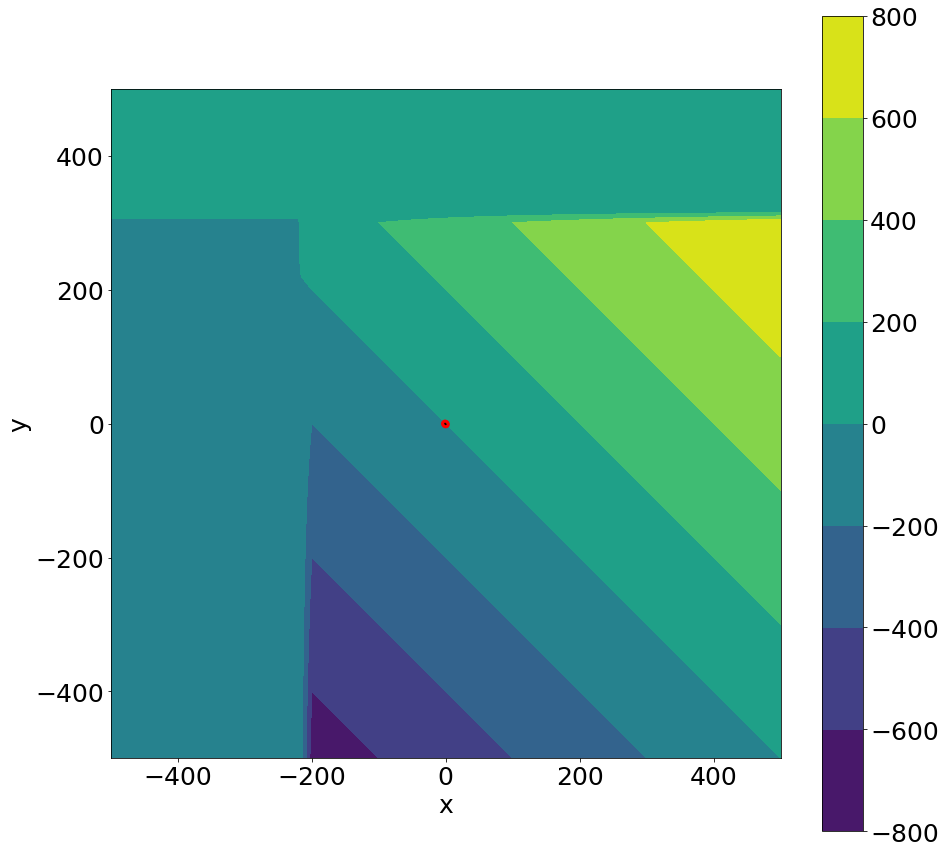

In [7]:
plot_substrate( X,Y, substrate )
plot_cells( positions, radii , velocities, X,Y )


In [11]:
animate( 2 , 240 )

Loading data from output00000000.csv ...


C:\Users\Paul\anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


Loading data from output00000002.csv ...
Loading data from output00000004.csv ...
Loading data from output00000006.csv ...
Loading data from output00000008.csv ...
Loading data from output00000010.csv ...
Loading data from output00000012.csv ...
Loading data from output00000014.csv ...
Loading data from output00000016.csv ...
Loading data from output00000018.csv ...
Loading data from output00000020.csv ...
Loading data from output00000022.csv ...
Loading data from output00000024.csv ...
Loading data from output00000026.csv ...
Loading data from output00000028.csv ...
Loading data from output00000030.csv ...
Loading data from output00000032.csv ...
Loading data from output00000034.csv ...
Loading data from output00000036.csv ...
Loading data from output00000038.csv ...
Loading data from output00000040.csv ...
Loading data from output00000042.csv ...
Loading data from output00000044.csv ...
Loading data from output00000046.csv ...
Loading data from output00000048.csv ...
Loading data fro